Plotting of the results of training many networks for Fig 1, first column (b-c-d) and Extended Data Fig. 1a, Extended Data Fig 3, full-rank networks. These all represent analyses on the selectivity spaces of 100 full-rank networks for each task. The data for this notebook was generated by the five scripts named ''' training_scripts/\<data\>_fr_fig1.py '''

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import seaborn as sns
from low_rank_rnns.modules import *
from low_rank_rnns import helpers, raposo, mante, regressions
import low_rank_rnns.mixedselectivity as ms

In [2]:
helpers.setup_matplotlib()
palette = sns.color_palette()
palette = [palette[2], palette[1], palette[0], palette[3], 'mediumpurple']

In [3]:
# Loading data

rdm_results = dict()
with np.load('../data/rdm_fr_results.npz') as d:
    rdm_results['p'] = d['arr_0']
    rdm_results['c'] = d['arr_1']
    rdm_results['preg'] = d['arr_2']
    rdm_results['creg'] = d['arr_3']
    rdm_results['acc'] = d['arr_4']
    rdm_results['loss'] = d['arr_5']
    rdm_results['acc_trunc'] = d['arr_6']
    rdm_results['loss_trunc'] = d['arr_7']
    rdm_results['acc_res'] = d['arr_8']
    rdm_results['loss_res'] = d['arr_9']
    
romo_results = dict()
with np.load('../data/romo_fr_results.npz') as d:
    romo_results['p'] = d['arr_0']
    romo_results['c'] = d['arr_1']
    romo_results['preg'] = d['arr_2']
    romo_results['creg'] = d['arr_3']
    romo_results['acc'] = d['arr_4']
    romo_results['loss'] = d['arr_5']
    romo_results['acc_trunc'] = d['arr_6']
    romo_results['loss_trunc'] = d['arr_7']
    romo_results['acc_res'] = d['arr_8']
    romo_results['loss_res'] = d['arr_9']
    
mante_results = dict()
with np.load('../data/mante_fr_results.npz') as d:
    mante_results['p'] = d['arr_0']
    mante_results['c'] = d['arr_1']
    mante_results['preg'] = d['arr_2']
    mante_results['creg'] = d['arr_3']
    mante_results['acc'] = d['arr_4']
    mante_results['loss'] = d['arr_5']
    mante_results['acc_trunc'] = d['arr_6']
    mante_results['loss_trunc'] = d['arr_7']
    mante_results['acc_res'] = d['arr_8']
    mante_results['loss_res'] = d['arr_9']
    
raposo_results = dict()
with np.load('../data/raposo_fr_results.npz') as d:
    raposo_results['p'] = d['arr_0']
    raposo_results['c'] = d['arr_1']
    raposo_results['preg'] = d['arr_2']
    raposo_results['creg'] = d['arr_3']
    raposo_results['acc'] = d['arr_4']
    raposo_results['loss'] = d['arr_5']
    raposo_results['acc_trunc'] = d['arr_6']
    raposo_results['loss_trunc'] = d['arr_7']
    raposo_results['acc_res'] = d['arr_8']
    raposo_results['loss_res'] = d['arr_9']
    
dms_results = dict()
with np.load('../data/dms_fr_results.npz') as d:
    dms_results['acc'] = d['arr_4']
    mask = dms_results['acc'] > 0.95  # Selecting only the DMS networks that were successfully trained
    print(mask.sum())   # All of them are fine here
    dms_results['p'] = d['arr_0'][mask]
    dms_results['c'] = d['arr_1'][mask]
    dms_results['preg'] = d['arr_2'][mask]
    dms_results['creg'] = d['arr_3'][mask]
    dms_results['loss'] = d['arr_5'][mask]
    dms_results['acc_trunc'] = d['arr_6'][mask]
    dms_results['loss_trunc'] = d['arr_7'][mask]
    dms_results['acc_res'] = d['arr_8'][mask]
    dms_results['loss_res'] = d['arr_9'][mask]
    dms_results['acc'] = dms_results['acc'][mask]
    
all_results = [rdm_results, romo_results, raposo_results, mante_results, dms_results]
labels = ['DM', 'WM', 'MDM', 'CDM', 'DMS']

## Experiment with smaller initial weights (for SI Fig 3)

rdm_results2 = dict()
with np.load('../data/rdm_fr_results2.npz') as d:
    rdm_results2['p'] = d['arr_0']
    rdm_results2['c'] = d['arr_1']
    rdm_results2['preg'] = d['arr_2']
    rdm_results2['creg'] = d['arr_3']
    rdm_results2['acc'] = d['arr_4']
    rdm_results2['loss'] = d['arr_5']
    rdm_results2['acc_trunc'] = d['arr_6']
    rdm_results2['loss_trunc'] = d['arr_7']
    rdm_results2['acc_res'] = d['arr_8']
    rdm_results2['loss_res'] = d['arr_9']

romo_results2 = dict()
with np.load('../data/romo_fr_results2.npz') as d:
    romo_results2['p'] = d['arr_0']
    romo_results2['c'] = d['arr_1']
    romo_results2['preg'] = d['arr_2']
    romo_results2['creg'] = d['arr_3']
    romo_results2['acc'] = d['arr_4']
    romo_results2['loss'] = d['arr_5']
    romo_results2['acc_trunc'] = d['arr_6']
    romo_results2['loss_trunc'] = d['arr_7']
    romo_results2['acc_res'] = d['arr_8']
    romo_results2['loss_res'] = d['arr_9']
    
raposo_results2 = dict()
with np.load('../data/raposo_fr_results2.npz') as d:
    raposo_results2['p'] = d['arr_0']
    raposo_results2['c'] = d['arr_1']
    raposo_results2['preg'] = d['arr_2']
    raposo_results2['creg'] = d['arr_3']
    raposo_results2['acc'] = d['arr_4']
    raposo_results2['loss'] = d['arr_5']
    raposo_results2['acc_trunc'] = d['arr_6']
    raposo_results2['loss_trunc'] = d['arr_7']
    raposo_results2['acc_res'] = d['arr_8']
    raposo_results2['loss_res'] = d['arr_9']
    
mante_results2 = dict()
with np.load('../data/mante_fr_results2.npz') as d:
    mante_results2['p'] = d['arr_0']
    mante_results2['c'] = d['arr_1']
    mante_results2['preg'] = d['arr_2']
    mante_results2['creg'] = d['arr_3']
    mante_results2['acc'] = d['arr_4']
    mante_results2['loss'] = d['arr_5']
    mante_results2['acc_trunc'] = d['arr_6']
    mante_results2['loss_trunc'] = d['arr_7']
    mante_results2['acc_res'] = d['arr_8']
    mante_results2['loss_res'] = d['arr_9']
    
dms_results2 = dict()
with np.load('../data/dms_fr_results2.npz') as d:
    dms_results['acc'] = d['arr_4']
    mask = dms_results['acc'] > 0.95  # Selecting only the DMS networks that were successfully trained
    print(mask.sum())  # There are 51 of them
    dms_results2['p'] = d['arr_0'][mask]
    dms_results2['c'] = d['arr_1'][mask]
    dms_results2['preg'] = d['arr_2'][mask]
    dms_results2['creg'] = d['arr_3'][mask]
    dms_results2['loss'] = d['arr_5'][mask]
    dms_results2['acc_trunc'] = d['arr_6'][mask]
    dms_results2['loss_trunc'] = d['arr_7'][mask]
    dms_results2['acc_res'] = d['arr_8'][mask]
    dms_results2['loss_res'] = d['arr_9'][mask]
    dms_results2['acc'] = dms_results['acc'][mask]

100
51


In [4]:
# Monte-Carlo distributions for the effect sizes

rdm_dist = np.load('../data/rdm_fr_c_boot_distr.npy')
romo_dist = np.load('../data/romo_fr_c_boot_distr.npy')
raposo_dist = np.load('../data/raposo_fr_c_boot_distr.npy')
mante_dist = np.load('../data/mante_fr_c_boot_distr.npy')
dms_dist = np.load('../data/dms_fr_c_boot_distr.npy')

In [5]:
for i, label in enumerate(labels):
    print(f'{label}: {len([p for p in all_results[i]["preg"] if p < 0.05 / 100])}')

DM: 1
WM: 6
MDM: 10
CDM: 100
DMS: 100


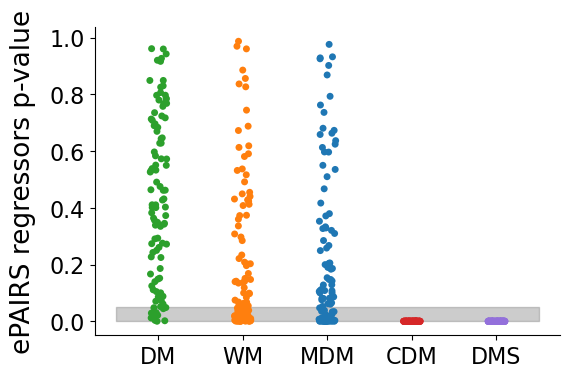

In [6]:
# Extended Data Fig. 1a

sns.stripplot(data=[res['preg'] for res in all_results], palette=palette)
plt.xticks(list(range(len(labels))), labels)
plt.ylabel('ePAIRS regressors p-value')
xlims = plt.gca().get_xlim()
plt.fill_between([xlims[0], xlims[1]], [0, 0], [0.05, 0.05], color='gray', alpha=.4)
# plt.savefig('si_sec1/reg_pval_fr.svg', bbox_inches='tight')

<ErrorbarContainer object of 3 artists>

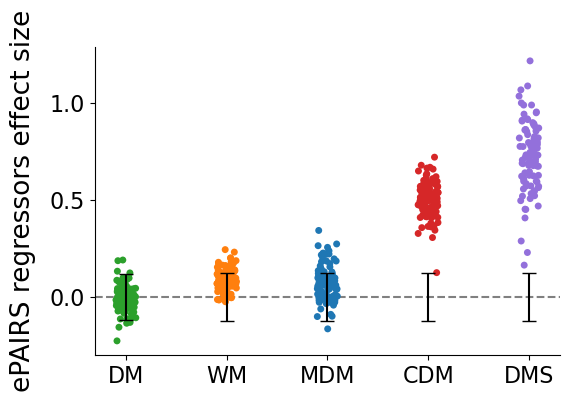

In [7]:
# Main Fig. 1d

sns.stripplot(data=[res['creg'] for res in all_results], palette=palette)
plt.axhline(0, ls='--', color='gray')
plt.xticks(list(range(len(labels))), labels)
plt.ylabel('ePAIRS regressors effect size')
plt.errorbar(0, 0, yerr=2*np.std(rdm_dist), ecolor='k', elinewidth=1.5, capsize=5, zorder=30)
plt.errorbar(1, 0, yerr=2*np.std(romo_dist), ecolor='k', elinewidth=1.5, capsize=5, zorder=30)
plt.errorbar(2, 0, yerr=2*np.std(raposo_dist), ecolor='k', elinewidth=1.5, capsize=5, zorder=30)
plt.errorbar(3, 0, yerr=2*np.std(mante_dist), ecolor='k', elinewidth=1.5, capsize=5, zorder=30)
plt.errorbar(4, 0, yerr=2*np.std(dms_dist), ecolor='k', elinewidth=1.5, capsize=5, zorder=30)
# plt.savefig('figure_1/reg_cval_fr.svg', bbox_inches='tight')

[Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4'), Text(4, 0, '5')]


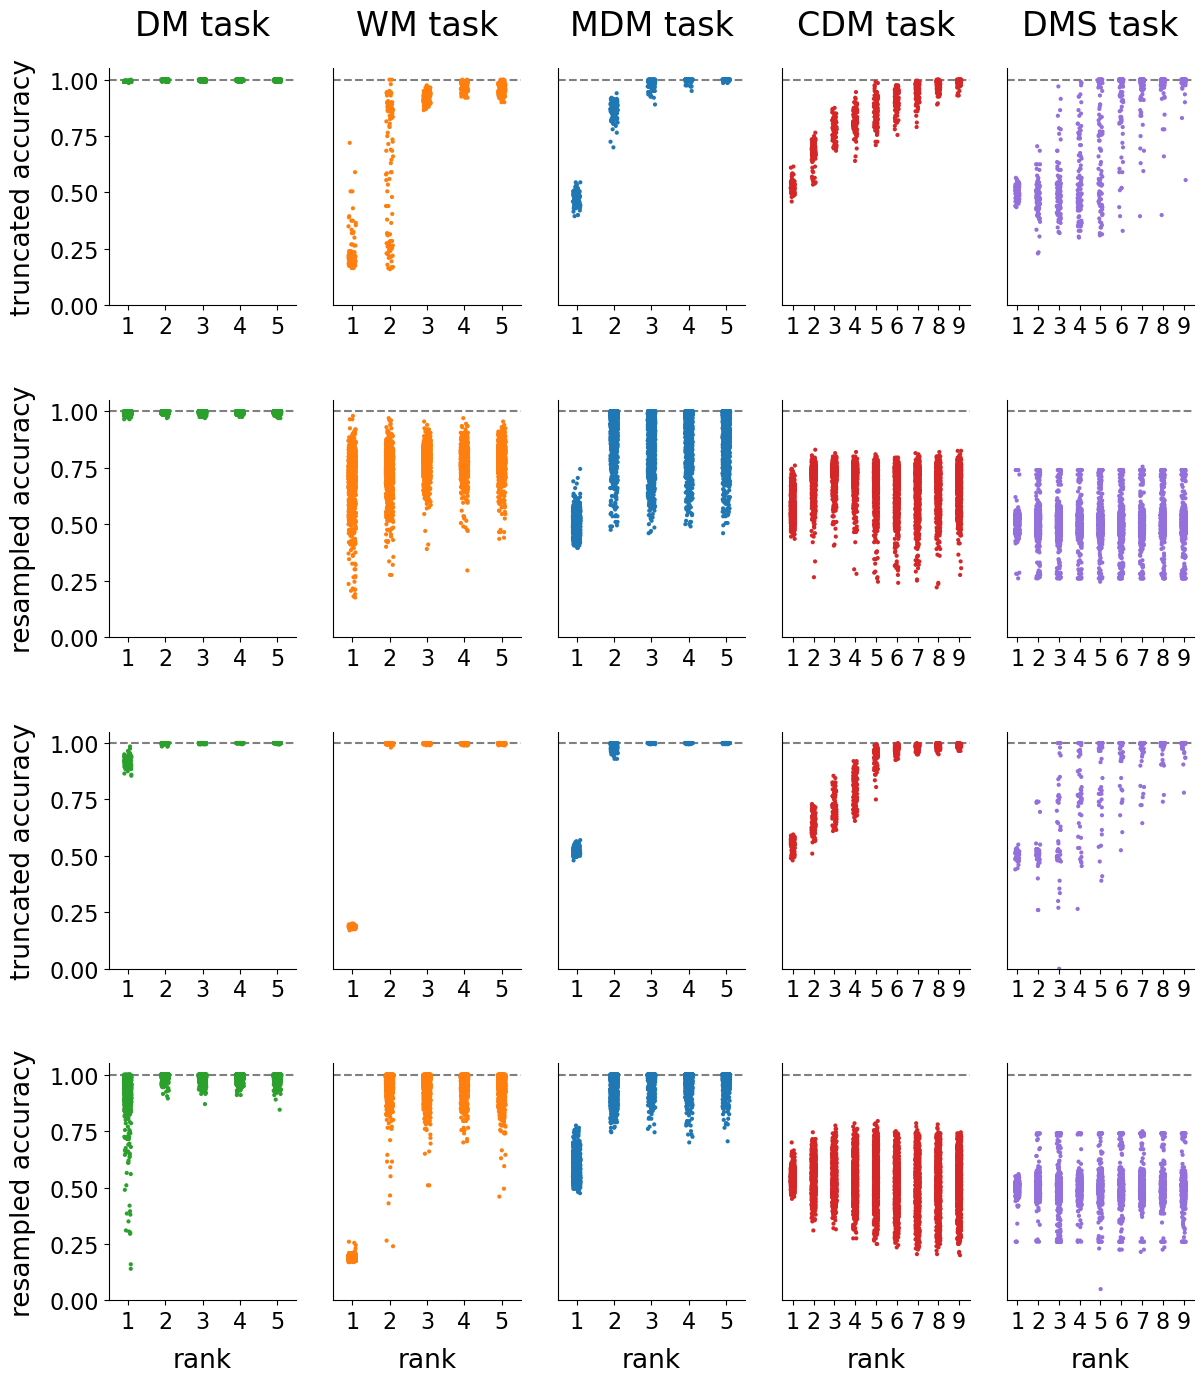

In [8]:
# Generating Extended Data Fig 3

figsize = plt.rcParams['figure.figsize']
figsize = (14, 16)
fig, axes = plt.subplots(4, 5, figsize = figsize)

ax = axes[0, 0]
sns.stripplot(data=rdm_results['acc_trunc'], color=palette[0], ax=axes[0, 0], size=3)
ax.axhline(1, c='gray', ls='--')
ax.set_xticks(list(range(5)))
ax.set_xticklabels(list(range(1, 6)))
ax.set_ylabel('truncated accuracy')
ax.set_ylim(0, 1.05)
print(ax.get_xticklabels())
ax.set_title('DM task')

ax = axes[0, 1]
sns.stripplot(data=romo_results['acc_trunc'], color=palette[1], ax=ax, size=3)
ax.axhline(1, c='gray', ls='--')
ax.set_xticks(list(range(5)))
ax.set_xticklabels(list(range(1, 6)))
ax.set_yticks([])
ax.set_ylim(0, 1.05)
ax.set_title('WM task')

ax = axes[0, 2]
sns.stripplot(data=raposo_results['acc_trunc'], color=palette[2], ax=ax, size=3)
ax.axhline(1, c='gray', ls='--')
ax.set_xticks(list(range(5)))
ax.set_xticklabels(list(range(1, 6)))
ax.set_yticks([])
ax.set_ylim(0, 1.05)
ax.set_title('MDM task')

ax = axes[0, 3]
sns.stripplot(data=mante_results['acc_trunc'], color=palette[3], ax=ax, size=3)
ax.axhline(1, c='gray', ls='--')
ax.set_xticks(list(range(9)))
ax.set_xticklabels(list(range(1, 10)))
ax.set_yticks([])
ax.set_ylim(0, 1.05)
ax.set_title('CDM task')

ax = axes[0, 4]
sns.stripplot(data=dms_results['acc_trunc'], color=palette[4], ax=ax, size=3)
ax.axhline(1, c='gray', ls='--')
ax.set_xticks(list(range(9)))
ax.set_xticklabels(list(range(1, 10)))
ax.set_yticks([])
ax.set_ylim(0, 1.05)
ax.set_title('DMS task')

# axes[1, 2].set_visible(False)


ax = axes[1, 0]
sns.stripplot(data=rdm_results['acc_res'].T.reshape((5, -1)).T, color=palette[0], ax=ax, size=3)
ax.set_ylim(0, 1.05)
ax.axhline(1, c='gray', ls='--')
ax.set_xticks(list(range(5)))
ax.set_xticklabels(list(range(1, 6)))
ax.set_ylabel('resampled accuracy')

ax = axes[1, 1]
sns.stripplot(data=romo_results['acc_res'].T.reshape((5, -1)).T, color=palette[1], ax=ax, size=3)
ax.axhline(1, c='gray', ls='--')
ax.set_xticks(list(range(5)))
ax.set_xticklabels(list(range(1, 6)))
ax.set_yticks([])
ax.set_ylim(0, 1.05)

ax = axes[1, 2]
sns.stripplot(data=raposo_results['acc_res'].T.reshape((5, -1)).T, color=palette[2], ax=ax, size=3)
ax.axhline(1, c='gray', ls='--')
ax.set_xticks(list(range(5)))
ax.set_xticklabels(list(range(1, 6)))
ax.set_yticks([])
ax.set_ylim(0, 1.05)

ax = axes[1, 3]
sns.stripplot(data=mante_results['acc_res'].T.reshape((9, -1)).T, color=palette[3], ax=ax, size=3)
ax.axhline(1, c='gray', ls='--')
ax.set_xticks(list(range(9)))
ax.set_xticklabels(list(range(1, 10)))
ax.set_yticks([])
ax.set_ylim(0, 1.05)

ax = axes[1, 4]
sns.stripplot(data=dms_results['acc_res'].T.reshape((9, -1)).T, color=palette[4], ax=ax, size=3)
ax.axhline(1, c='gray', ls='--')
ax.set_xticks(list(range(9)))
ax.set_xticklabels(list(range(1, 10)))
ax.set_yticks([])
ax.set_ylim(0, 1.05)

## WITH rho = 0.1

ax = axes[2, 0]
sns.stripplot(data=rdm_results2['acc_trunc'], color=palette[0], ax=axes[2, 0], size=3)
ax.set_ylim(0, 1.05)
ax.axhline(1, c='gray', ls='--')
ax.set_xticks(list(range(5)))
ax.set_xticklabels(list(range(1, 6)))
ax.set_ylabel('truncated accuracy')

ax = axes[2, 1]
sns.stripplot(data=romo_results2['acc_trunc'], color=palette[1], ax=ax, size=3)
ax.axhline(1, c='gray', ls='--')
ax.set_xticks(list(range(5)))
ax.set_xticklabels(list(range(1, 6)))
ax.set_yticks([])
ax.set_ylim(0, 1.05)

ax = axes[2, 2]
sns.stripplot(data=raposo_results2['acc_trunc'], color=palette[2], ax=ax, size=3)
ax.axhline(1, c='gray', ls='--')
ax.set_xticks(list(range(5)))
ax.set_xticklabels(list(range(1, 6)))
ax.set_yticks([])
ax.set_ylim(0, 1.05)

ax = axes[2, 3]
sns.stripplot(data=mante_results2['acc_trunc'], color=palette[3], ax=ax, size=3)
ax.axhline(1, c='gray', ls='--')
ax.set_xticks(list(range(9)))
ax.set_xticklabels(list(range(1, 10)))
ax.set_yticks([])
ax.set_ylim(0, 1.05)

ax = axes[2, 4]
sns.stripplot(data=dms_results2['acc_trunc'], color=palette[4], ax=ax, size=3)
ax.axhline(1, c='gray', ls='--')
ax.set_xticks(list(range(9)))
ax.set_xticklabels(list(range(1, 10)))
ax.set_yticks([])
ax.set_ylim(0, 1.05)

# axes[1, 2].set_visible(False)


ax = axes[3, 0]
sns.stripplot(data=rdm_results2['acc_res'].T.reshape((5, -1)).T, color=palette[0], ax=ax, size=3)
ax.set_ylim(0, 1.05)
ax.axhline(1, c='gray', ls='--')
ax.set_xticks(list(range(5)))
ax.set_xticklabels(list(range(1, 6)))
ax.set_xlabel('rank')
ax.set_ylabel('resampled accuracy')

ax = axes[3, 1]
sns.stripplot(data=romo_results2['acc_res'].T.reshape((5, -1)).T, color=palette[1], ax=ax, size=3)
ax.axhline(1, c='gray', ls='--')
ax.set_xticks(list(range(5)))
ax.set_xticklabels(list(range(1, 6)))
ax.set_yticks([])
ax.set_ylim(0, 1.05)
ax.set_xlabel('rank')

ax = axes[3, 2]
sns.stripplot(data=raposo_results2['acc_res'].T.reshape((5, -1)).T, color=palette[2], ax=ax, size=3)
ax.axhline(1, c='gray', ls='--')
ax.set_xticks(list(range(5)))
ax.set_xticklabels(list(range(1, 6)))
ax.set_yticks([])
ax.set_ylim(0, 1.05)
ax.set_xlabel('rank')

ax = axes[3, 3]
sns.stripplot(data=mante_results2['acc_res'].T.reshape((9, -1)).T, color=palette[3], ax=ax, size=3)
ax.axhline(1, c='gray', ls='--')
ax.set_xticks(list(range(9)))
ax.set_xticklabels(list(range(1, 10)))
ax.set_yticks([])
ax.set_ylim(0, 1.05)
ax.set_xlabel('rank')

ax = axes[3, 4]
sns.stripplot(data=dms_results2['acc_res'].T.reshape((9, -1)).T, color=palette[4], ax=ax, size=3)
ax.axhline(1, c='gray', ls='--')
ax.set_xticks(list(range(9)))
ax.set_xticklabels(list(range(1, 10)))
ax.set_yticks([])
ax.set_ylim(0, 1.05)
ax.set_xlabel('rank')

plt.subplots_adjust(wspace=.2, hspace=.4)

# plt.savefig('figs_illustrator/truncated_fullranks_init.pdf', bbox_inches='tight')

 # Panels 1b-d

## MDM example network

In [9]:
helpers.setup_matplotlib()
color = sns.color_palette('deep')[0]

In [10]:
size = 512
alpha = .2
noise_std = 5e-2
x_train, y_train, mask_train, x_val, y_val, mask_val = raposo.generate_data(1000)
net = FullRankRNN(4, size, 1, noise_std, alpha, train_wi=True)
# w0 = net.wrec.detach().numpy().copy()
# train(net, x_train, y_train, mask_train, 40, lr=1e-4)
net.load_state_dict(torch.load('../models/raposo_fr_fig1.pt', map_location='cpu'))

<All keys matched successfully>

In [11]:
loss, acc = raposo.test(net, x_val, y_val, mask_val)
print(loss, acc)

0.058909930288791656 0.9950000047683716


(500, 512)
clusteriness: 0.02320526369701095
data mean: 0.247, mc mean: 0.248
KS 2 sample test: p=0.2515073889981009
Wilcoxon rank-sum test: p=0.7134552455814118
Kruskal-Wallis test: p=0.71345524571541


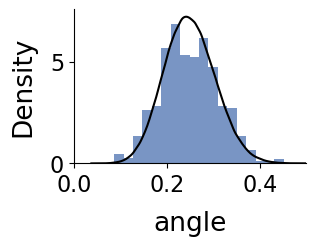

In [12]:
# Panel c

reg_space, _ = regressions.regression_raposo(net)
figsize = plt.rcParams['figure.figsize']
figsize = (figsize[0] / 2, figsize[1] / 2)
p_reg, c_reg = ms.epairs(reg_space, 500, figsize=figsize, xlim=(-0., .5), col=color)
# plt.savefig('figure_1/epairs_raposo_reg.pdf', bbox_inches='tight')

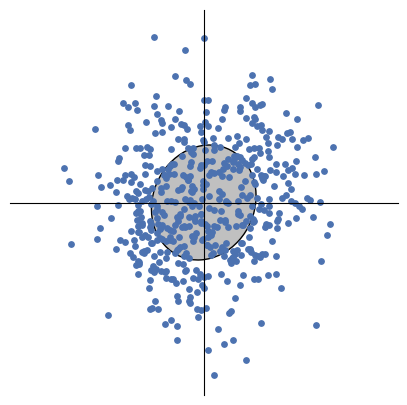

In [13]:
# Panel b

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(reg_space[:, 2], reg_space[:, 3], color=color, s=15)
helpers.center_axes(ax)
xlim = 1.3 * max(-np.min(reg_space[:, 0]), np.max(reg_space[:, 0]))
ylim = 1.3 * max(-np.min(reg_space[:, 1]), np.max(reg_space[:, 1]))
ax.set_xlim(-xlim, xlim)
ax.set_ylim(-ylim, ylim)

X = np.array([reg_space[:, 2], reg_space[:, 3]]).T
cov = X.T @ X / X.shape[0]
eigvals, eigvecs = np.linalg.eig(cov)
v1 = eigvecs[:, 0]
angle = np.arctan(v1[1] / v1[0])
angle = angle * 180 / np.pi
std_factor = 1
ax.add_artist(Ellipse(xy=[0, 0], 
                      angle=angle,
                      width=np.sqrt(eigvals[0]) * 2 * std_factor, 
                      height=np.sqrt(eigvals[1]) * 2 * std_factor, 
                      fill=True, fc='silver', ec='black', lw=1, zorder=-1))

# plt.savefig('figure_1/raposo_reg_scatter.pdf', bbox_inches='tight')

## CDM example network

In [14]:
helpers.setup_matplotlib()
color = sns.color_palette('deep')[3]

In [15]:
size = 512
alpha = .2
noise_std = 5e-2
x_train, y_train, mask_train, x_val, y_val, mask_val = mante.generate_mante_data(1000, fraction_validation_trials=.2)
net = FullRankRNN(4, size, 1, noise_std, alpha, rho=1, train_wi=True)
net.load_state_dict(torch.load('../models/mante_fr_fig1.pt', map_location='cpu'))

<All keys matched successfully>

In [16]:
loss, acc = mante.test_mante(net, x_val, y_val, mask_val)
print(loss, acc)

0.0705748200416565 0.9900000095367432


In [17]:
reg_space, r2 = regressions.regression_mante(net)

(500, 512)
clusteriness: 0.6634200575462588
data mean: 0.212, mc mean: 0.248
KS 2 sample test: p=1.5106061679647248e-29
Wilcoxon rank-sum test: p=1.986939507959467e-25
Kruskal-Wallis test: p=1.9869395080967498e-25


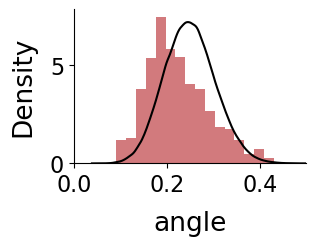

In [18]:
# Panel c

figsize = plt.rcParams['figure.figsize']
figsize = (figsize[0] / 2, figsize[1] / 2)
p_reg, c_reg = ms.epairs(reg_space, 500, figsize=figsize, xlim=(-0., .5), col=color)
# plt.savefig('figure_1/epairs_mante_reg.pdf', bbox_inches='tight')

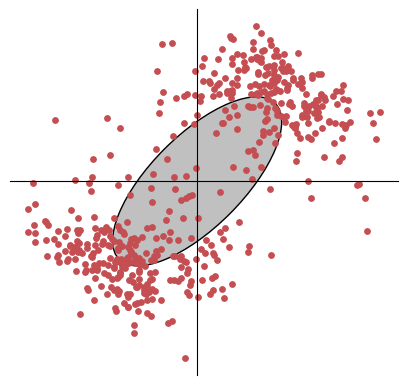

In [19]:
# Panel b

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(reg_space[:, 0], reg_space[:, 1], s=15, color=sns.color_palette('deep')[3])
ax.set_aspect(1)
helpers.center_axes(ax)

X = np.array([reg_space[:, 0], reg_space[:, 1]]).T
cov = X.T @ X / X.shape[0]
eigvals, eigvecs = np.linalg.eig(cov)
v1 = eigvecs[:, 0]
angle = np.arctan(v1[1] / v1[0])
angle = angle * 180 / np.pi
std_factor = 1
ax.add_artist(Ellipse(xy=[0, 0], 
                      angle=angle,
                      width=np.sqrt(eigvals[0]) * 2 * std_factor, 
                      height=np.sqrt(eigvals[1]) * 2 * std_factor, 
                      fill=True, fc='silver', ec='black', lw=1, zorder=-1))

# plt.savefig('figure_1/mante_reg_scatter.pdf', bbox_inches='tight')